In [217]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from skimage.io import imread, imshow
%matplotlib inline
import scipy.linalg as sla
from sklearn.preprocessing import StandardScaler
import scipy.misc
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# import re
# from nltk.stem.snowball import SnowballStemmer
# import pandas as pd

In [2]:
K=3
centroids = np.array([[3,3],[6,2],[8,5]])

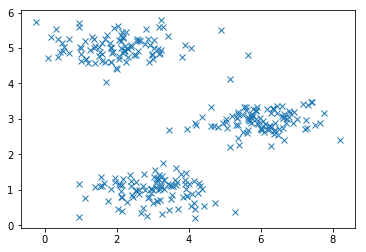

In [3]:
data = loadmat('ex7data2', mat_dtype=True)

X = data['X']

plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
plt.show()
# y = data['y'][:,0]

# plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
# plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')

# plt.show()

In [4]:
def calcDistance(x,y):
    delta = x-y
    return np.sqrt(delta.dot(delta))

def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    i = 0
    for x in X:
        distance = calcDistance(x, centroids[0])
        for j in range(1,K,1):
            newDistance = calcDistance(x, centroids[j])
            if distance > newDistance:
                distance = newDistance
                idx[i] = j
        i += 1
    return idx

def computeCentroids(X,idx,K):
    centroids = np.empty((K,X.shape[1]))
    for mu in range(K):
        centroids[mu] = X[idx==mu].mean(axis=0)
    return centroids

def runKMeans(X,initial_centroids,max_iters):
    centroids = initial_centroids.copy()
    K = centroids.shape[0]
    dimensions = centroids.shape[1]
    centTrace = initial_centroids.copy().reshape(1,K,dimensions) #np.array([max_iters,K,centroids.shape[1]])
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
        centTrace = np.append(centTrace, centroids.reshape(1,K,dimensions),axis=0)
    return centroids, idx, centTrace

In [5]:
idx = findClosestCentroids(X, centroids)
idx[:3]

array([ 0.,  2.,  1.])

In [6]:
computeCentroids(X, idx, K)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [7]:
Kcent, idx, trace = runKMeans(X,centroids,10)

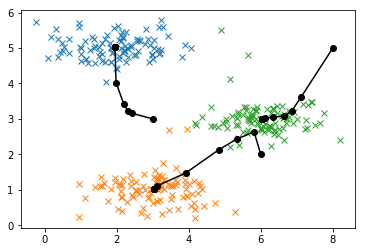

In [8]:
plt.plot(X[idx==0][:,0], X[idx==0][:,1], linestyle='', marker='x')
plt.plot(X[idx==1][:,0], X[idx==1][:,1], linestyle='', marker='x')
plt.plot(X[idx==2][:,0], X[idx==2][:,1], linestyle='', marker='x')
plt.plot(trace[:,0,0], trace[:,0,1], marker='o', color='black')
plt.plot(trace[:,1,0], trace[:,1,1], marker='o', color='black')
plt.plot(trace[:,2,0], trace[:,2,1], marker='o', color='black')
plt.show()

In [9]:
initialCentroids = X[np.random.choice(range(X.shape[0]),K)]
Kcent, idx, trace = runKMeans(X,initialCentroids,10)

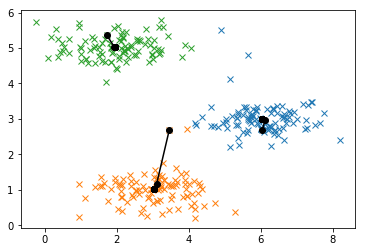

In [10]:
plt.plot(X[idx==0][:,0], X[idx==0][:,1], linestyle='', marker='x')
plt.plot(X[idx==1][:,0], X[idx==1][:,1], linestyle='', marker='x')
plt.plot(X[idx==2][:,0], X[idx==2][:,1], linestyle='', marker='x')
plt.plot(trace[:,0,0], trace[:,0,1], marker='o', color='black')
plt.plot(trace[:,1,0], trace[:,1,1], marker='o', color='black')
plt.plot(trace[:,2,0], trace[:,2,1], marker='o', color='black')
plt.show()

In [11]:
Kcent

array([[ 6.03366736,  3.00052511],
       [ 3.04367119,  1.01541041],
       [ 1.95399466,  5.02557006]])

Image compression

In [12]:
img = imread('bird_small.png')

In [13]:
X_img = img.reshape(img.shape[0]*img.shape[1], 3).copy()

In [14]:
K=16
initialCentroids = X_img[np.random.choice(range(X_img.shape[0]),K)]
Kcent, idx, trace = runKMeans(X_img,initialCentroids,20)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [15]:
for i in range(K):
    X_img[idx==i] = Kcent[i]

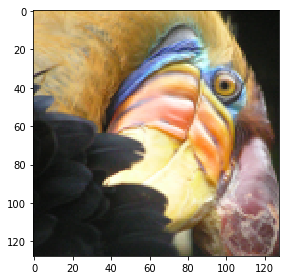

In [16]:
imshow(img)

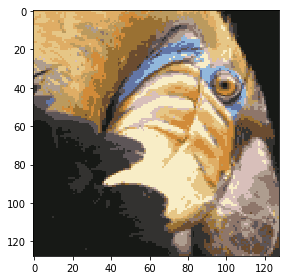

In [17]:
imshow(X_img.reshape([128,128,3]))

PCA

In [18]:
data = loadmat('ex7data1', mat_dtype=True)

X = data['X']
m = X.shape[0]

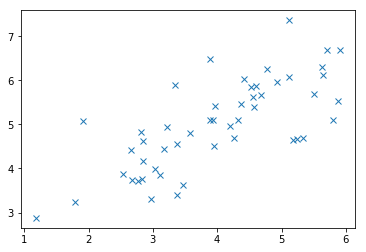

In [19]:
plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
plt.show()

In [20]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

mu = scaler.mean_

In [83]:
X_sc = (X-X.mean(axis=0))/np.sqrt(((X-X.mean(axis=0))**2).mean(axis=0)*50/49)
mu = X.mean(axis=0)

In [87]:
sgma = X_sc.T.dot(X_sc)/(m)

In [88]:
sgma

array([[ 0.98      ,  0.72081977],
       [ 0.72081977,  0.98      ]])

In [85]:
np.cov(X_sc.T)

array([[ 1.        ,  0.73553038],
       [ 0.73553038,  1.        ]])

In [89]:
U,S,V = sla.svd(sgma)

In [91]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [92]:
S

array([ 1.70081977,  0.25918023])

In [93]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [94]:
illust = np.insert(mu.reshape(1,2),1,(mu+S[0]*U[:,0]).reshape(1,2),axis=0)

In [95]:
illust2 = np.insert(mu.reshape(1,2),1,(mu+S[1]*U[:,1]).reshape(1,2),axis=0)

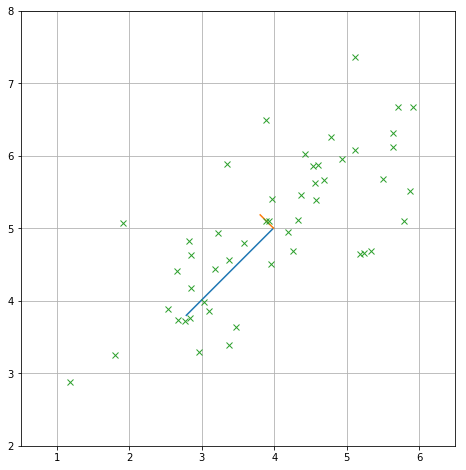

In [96]:
plt.figure(figsize=[10,8])
plt.plot(illust[:,0], illust[:,1])
plt.plot(illust2[:,0], illust2[:,1])
plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
# plt.plot([0,U[0,0]], [0,U[1,0]])
# plt.plot([0,U[0,1]], [0,U[1,1]])
plt.grid()
plt.ylim(2,8)
plt.xlim(.5,6.5)
plt.axes().set_aspect('equal')
plt.show()

In [97]:
K=1

In [45]:
def projectData(X_norm, U, K):
    return X_norm.dot(U[:,:K])

In [130]:
proj = projectData(X_sc, U, K)

In [131]:
proj[0]

array([ 1.48127391])

In [133]:
proj[0]*U[:,0]

array([-1.04741883, -1.04741883])

In [123]:
def recoverData(Z, U, K):
    recovered = Z.dot(U[:,:K].T)
    return recovered

In [134]:
Xrec = recoverData(proj, U, K)

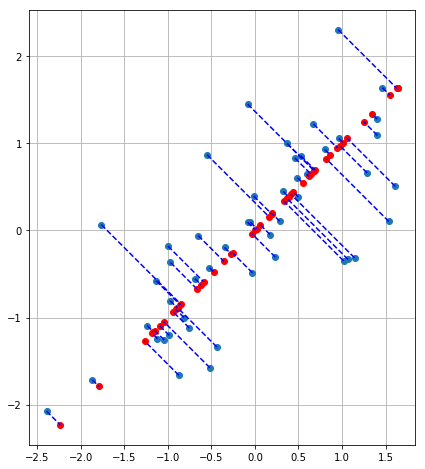

In [135]:
plt.figure(figsize=[10,8])
plt.plot(X_sc[:,0], X_sc[:,1], linestyle='', marker='o')
plt.plot(Xrec[:,0], Xrec[:,1], linestyle='', marker='o', color='r')
for i in range(X_sc.shape[0]):
    plt.plot([X_sc[i,0],Xrec[i,0]],[X_sc[i,1],Xrec[i,1]], linestyle='--', color='b')
plt.axes().set_aspect('equal')
plt.grid()
plt.show()

Facial recognition

In [143]:
faces = loadmat('ex7faces.mat', mat_dtype=True)
X = faces['X']

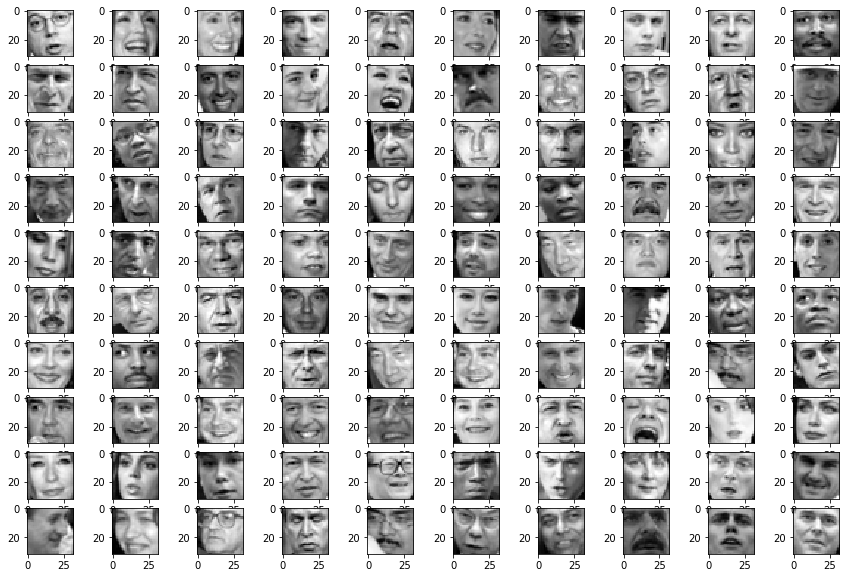

In [153]:
cols,rows = 10,10
indicies = np.random.choice(np.arange(X.shape[0]), cols*rows)
fig,ax = plt.subplots(rows,cols,figsize=[15,10])

for i in range(rows):
    for j in range(cols):
        ax[i,j].imshow(scipy.misc.toimage(X[indicies[i*cols+j]].reshape(32,32).T), cmap='gray')

In [154]:
m = X.shape[0]
X_sc = (X-X.mean(axis=0))/np.sqrt(((X-X.mean(axis=0))**2).mean(axis=0)*m/(m-1))
mu = X.mean(axis=0)

In [156]:
sgma = X_sc.T.dot(X_sc)/m

In [160]:
U,S,V = sla.svd(sgma)

In [210]:
K=100
Z = projectData(X_sc, U, K)
Xrec = recoverData(Z, U, K)

In [211]:
varLost = ((X_sc-Xrec)**2).sum()/(X_sc**2).sum()
print(varLost)

0.0680679571354


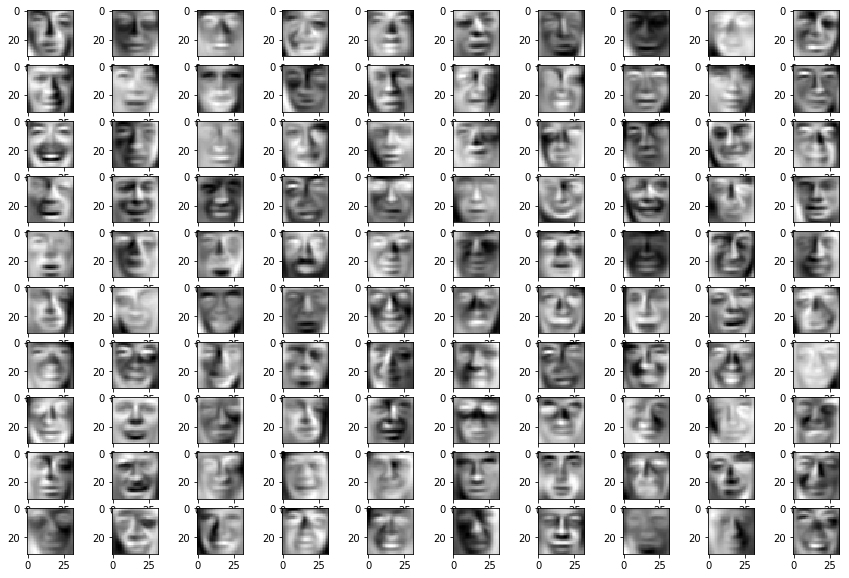

In [181]:
cols,rows = 10,10
indicies = np.random.choice(np.arange(X.shape[0]), cols*rows)
fig,ax = plt.subplots(rows,cols,figsize=[15,10])

for i in range(rows):
    for j in range(cols):
        ax[i,j].imshow(scipy.misc.toimage(Xrec[indicies[i*cols+j]].reshape(32,32).T), cmap='gray')

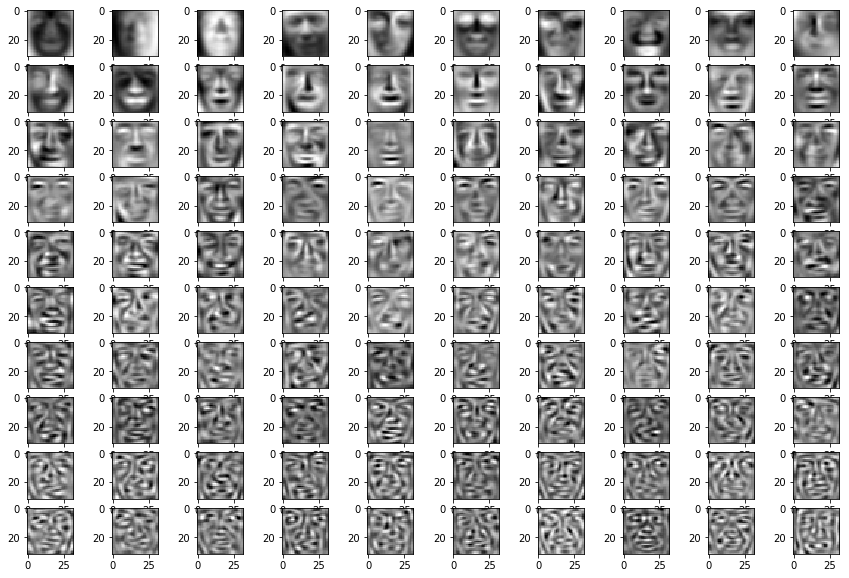

In [182]:
cols,rows = 10,10
# indicies = np.random.choice(np.arange(X.shape[0]), cols*rows)
fig,ax = plt.subplots(rows,cols,figsize=[15,10])

for i in range(rows):
    for j in range(cols):
        ax[i,j].imshow(scipy.misc.toimage(U[:,i*cols+j].reshape(32,32).T), cmap='gray')

In [234]:
rindex = np.random.choice(X_img.shape[0],1000)

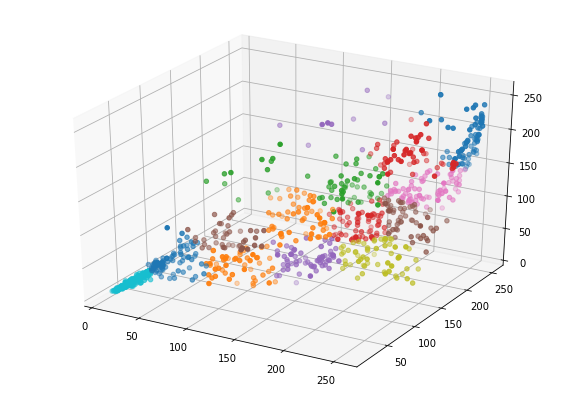

In [271]:
imgX = img.reshape(16384,3).copy()
Klusters=16
fig = plt.figure(figsize=[10,7])
ax = fig.gca(projection='3d')
for i in range(Klusters):
    ax.scatter3D(imgX[rindex,0][idx[rindex]==i], imgX[rindex,1][idx[rindex]==i], imgX[rindex,2][idx[rindex]==i]) #, c=range(imgX[rindex][idx[rindex]==i].shape[0]))
# ax.scatter3D(img.reshape(16384,3)[rindex,0], img.reshape(16384,3)[rindex,1], img.reshape(16384,3)[rindex,2], )


In [272]:
m = imgX.shape[0]
imgX_sc = (imgX-imgX.mean(axis=0))/np.sqrt(((imgX-imgX.mean(axis=0))**2).mean(axis=0)*m/(m-1))
mu = imgX.mean(axis=0)

In [273]:
sgma = imgX_sc.T.dot(imgX_sc)/m

In [274]:
U,S,V = sla.svd(sgma)

In [288]:
K=2
Z = -projectData(imgX_sc, U, K)
Xrec = recoverData(Z, U, K)

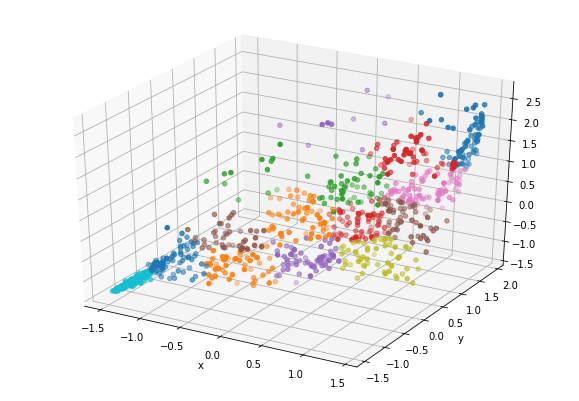

In [281]:
Klusters=16
fig = plt.figure(figsize=[10,7])
ax = fig.gca(projection='3d')
for i in range(Klusters):
    ax.scatter3D(imgX_sc[rindex,0][idx[rindex]==i], imgX_sc[rindex,1][idx[rindex]==i], imgX_sc[rindex,2][idx[rindex]==i]) 
plt.xlabel('x')
plt.ylabel('y')

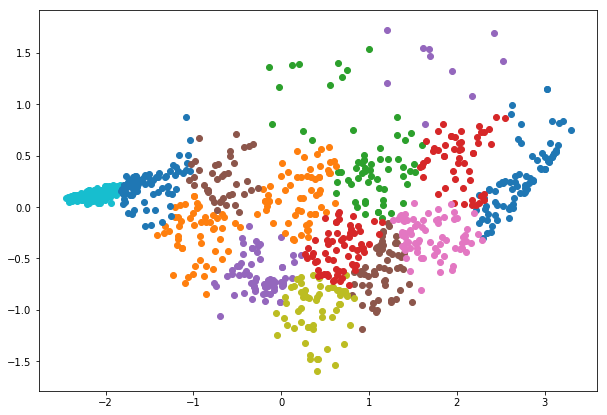

In [289]:
Klusters=16
fig = plt.figure(figsize=[10,7])
for i in range(Klusters):
    plt.scatter(Z[rindex,0][idx[rindex]==i], Z[rindex,1][idx[rindex]==i]) 